### 

In [1]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
df.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


0    2898
1    1049
Name: Insult, dtype: int64


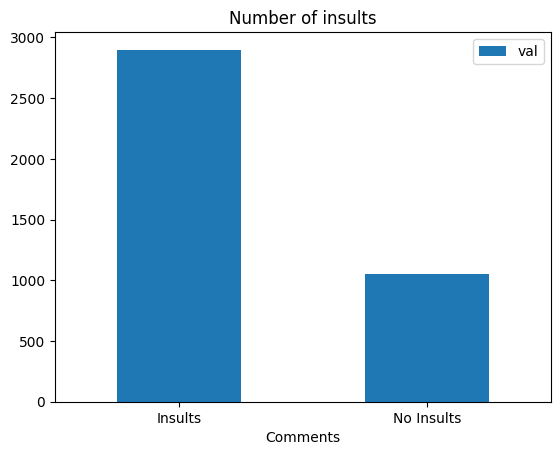

In [2]:
# from Insults, show me how many 1 and 0 i have
num = df['Insult'].value_counts()

print(num)

plot = pd.DataFrame({'Comments':['Insults', 'No Insults'], 'val':[num[0], num[1]]})
ax = plot.plot.bar(title='Number of insults',x='Comments', y='val', rot=0)


In [3]:
df_1 = df.dropna()
df_clean = df_1.query('Insult!=0')
df_clean.head(20)


,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."
15,1,20120611090207Z,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."
16,1,20120320162532Z,"""You with the 'racist' screen name\n\nYou are ..."
18,1,20120320075347Z,"""your such a dickhead..."""
19,1,20120320203947Z,"""Your a retard go post your head up your #%&*"""
34,1,20120515132156Z,"""Allinit123, your\xa0hypocrisy\xa0is sickening..."
37,1,20120620161958Z,"""I can't believe the stupid people on this sit..."
38,1,20120609163743Z,"""fucking behave then you prick!"""


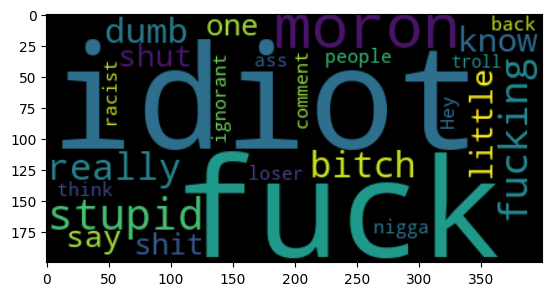

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

text = df_clean['Comment'].to_string(index=False)
processed_text = re.sub(r'\bxa0\b', '', text)

wordcloud = WordCloud(max_words=25, min_word_length=3, ).generate(processed_text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [5]:
global bad_dict
badfile = open('../misc/insults.txt')
bad_dict = dict()
for line in badfile:
    bw = line.split(',')
    if len(bw) == 2:
        bad_dict[bw[0]] = bw[1].strip()

# filtered_df = df[df['Comment'].str.contains(insults)]

filtered_df.head()


NameError: name 'insults' is not defined

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize the text

token_arr = []

for text in df_clean['Comment'].values:
    tokens = word_tokenize(text)

    # Lowercase the tokens
    tokens = [token.lower() for token in tokens]

    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = list(filter(None, tokens))
    token_arr.append(tokens)
# Print the processed tokens
print(token_arr)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['fuck', 'dad'], ['either', 'fake', 'extrem', 'stupid', 'mayb'], ['idiot', 'understand', 'neither', 'taxat', 'women', 'health'], ['reason', 'u', 'sound', 'retard', 'lol', 'damn', 'u', 'negro'], ['racist', 'screen', 'namenny', 'pieceofshit'], ['dickhead'], ['retard', 'go', 'post', 'head'], ['allinit123', 'yourxa0hypocrisyxa0i', 'sicken', 'ignor', 'loser'], ['ca', 'nt', 'believ', 'stupid', 'peopl', 'site', 'idea', 'go', 'onxa0', 'foolsxa0', 'use', 'idiotsxa0', 'hide', 'truth', 'fool', 'protect', 'would', 'look', 'like', 'use', 'idiot'], ['fuck', 'behav', 'prick'], ['sum', 'total', 'convers', 'first', 'abus', 'call', 'troll', 'typic', 'socialist', 'idiot', 'keep', 'non', 'exist', 'class', 'warfar', 'pointless'], ['faggot'], ['aimless', 'abe', 'delus', 'weirdo', 'lock', 'insid', 'kept', 'away', 'computersxa0', 'anyon', 'doubt', 'lunaci', 'abe', 'moron', 'prog', 'frog', 'nyc', 'pleas', 'read', 'thread', 'see', 'abe', 'complet', 'come', 'apart', 'seam', 'go', 'deep', 'end'], ['even', 'troll

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the required resources
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze the sentiment of each comment
for comment in df_clean['Comment'].values:
    scores = analyzer.polarity_scores(comment)
    print(scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...


{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.395, 'neu': 0.432, 'pos': 0.173, 'compound': -0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.5267}
{'neg': 0.579, 'neu': 0.421, 'pos': 0.0, 'compound': -0.6705}
{'neg': 0.132, 'neu': 0.591, 'pos': 0.277, 'compound': 0.8114}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.8767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.15, 'neu': 0.81, 'pos': 0.04, 'compound': -0.7506}
{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.302, 'neu': 0.377, 'pos': 0.321, 'compound': -0.2023}
{'neg': 0.519, 'neu': 0.481, 'pos': 0.0, 'compound': -0.8238}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,